In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
insurance_df = pd.read_csv(r'C:\Users\ODCHC PC\Downloads\insurance.csv')

In [12]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
insurance_df.shape

(1338, 7)

In [18]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
insurance_df.duplicated().any()

True

In [24]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [26]:
insurance_df1 = insurance_df.drop_duplicates()

In [28]:
insurance_df1.shape

(1337, 7)

In [32]:
insurance_df1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [34]:
insurance_df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
numerical_columns = insurance_df1.select_dtypes(include="number").columns.to_list()
categorical_columns = insurance_df1.select_dtypes(exclude="number").columns.to_list()
print(f"numerical columns : {numerical_columns}")
print(f"categorical columns : {categorical_columns}")

numerical columns : ['age', 'bmi', 'children', 'charges']
categorical columns : ['sex', 'smoker', 'region']


In [40]:
insurance_df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
insurance_df1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [44]:
insurance_df1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [46]:
insurance_df1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [48]:
insurance_df1['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

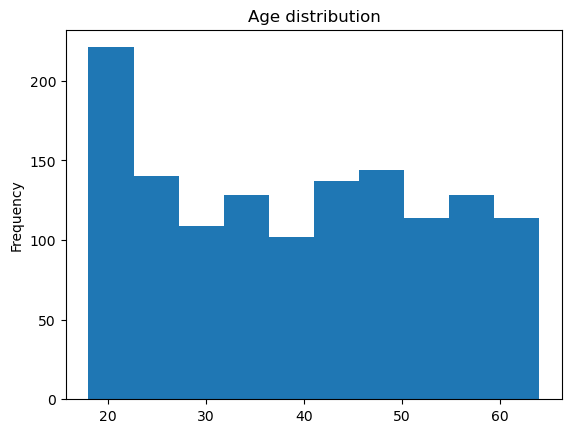

In [50]:
insurance_df1['age'].plot(kind = 'hist')
plt.title("Age distribution")
plt.show()


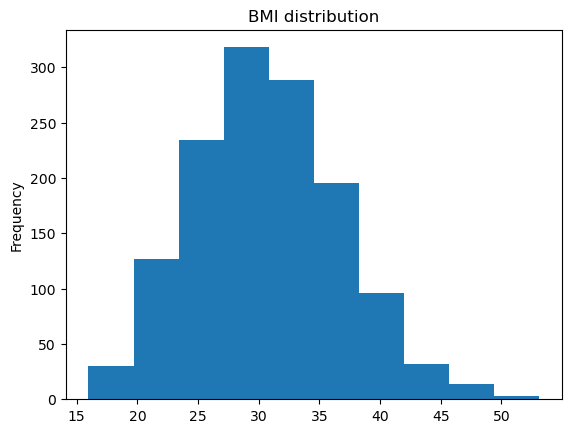

In [52]:
insurance_df1['bmi'].plot(kind = 'hist')
plt.title("BMI distribution")
plt.show()

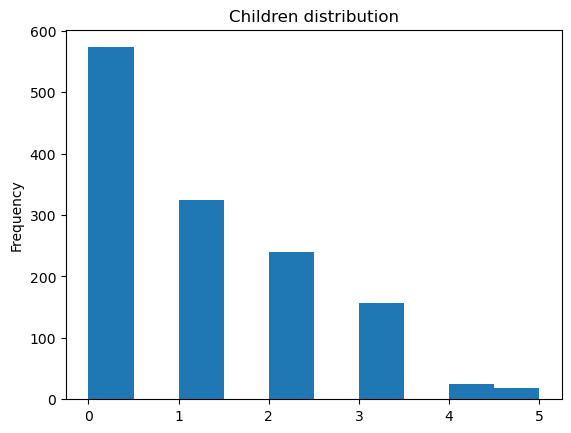

In [54]:
insurance_df1['children'].plot(kind = 'hist')
plt.title("Children distribution")
plt.show()

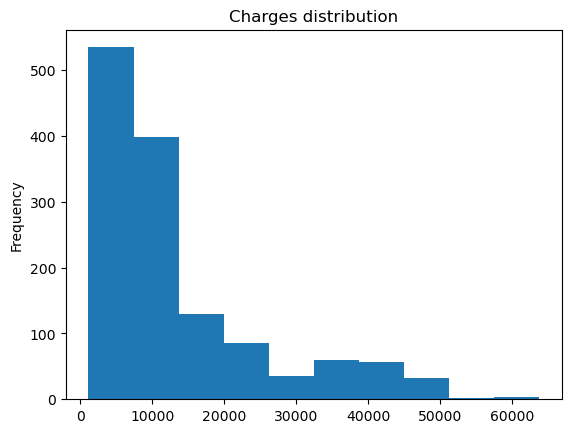

In [58]:
insurance_df1['charges'].plot(kind = 'hist')
plt.title("Charges distribution")
plt.show()

<Axes: xlabel='children'>

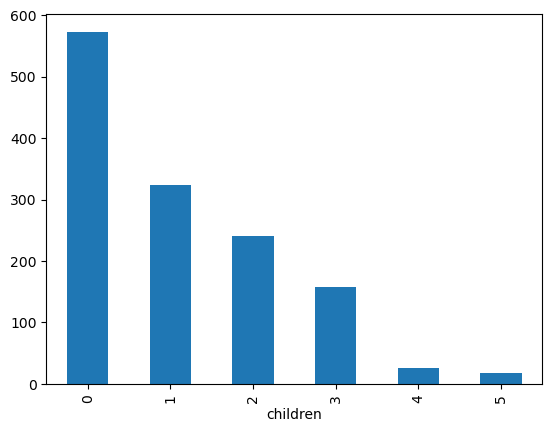

In [60]:
insurance_df1["children"].value_counts().plot(kind= 'bar')

<Axes: xlabel='sex'>

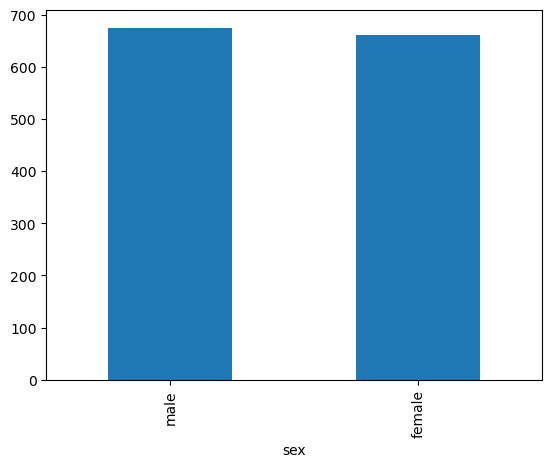

In [62]:
insurance_df1["sex"].value_counts().plot(kind= 'bar')

<Axes: xlabel='smoker'>

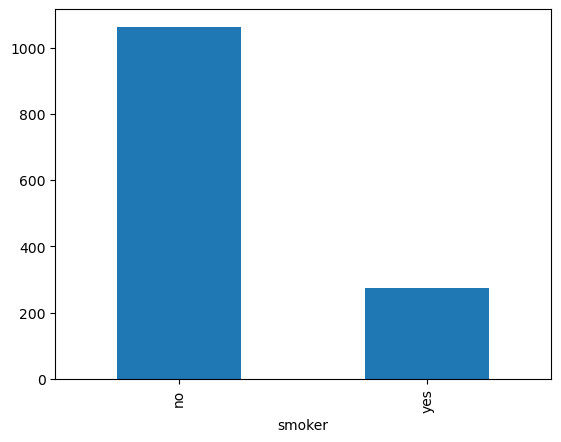

In [64]:
insurance_df1["smoker"].value_counts().plot(kind= 'bar')

<Axes: xlabel='region'>

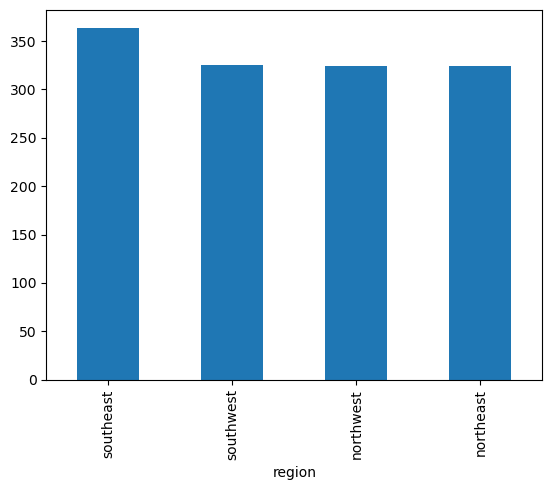

In [66]:
insurance_df1["region"].value_counts().plot(kind= 'bar')

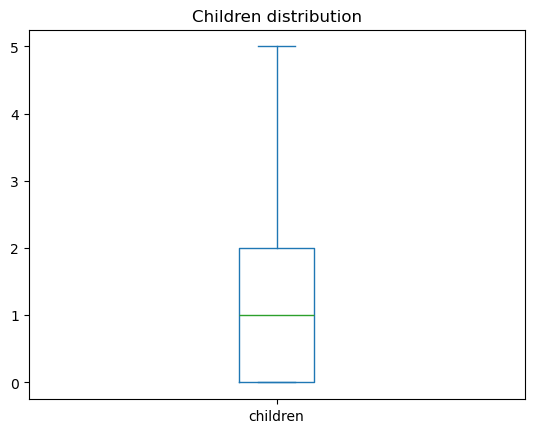

In [70]:
insurance_df1['children'].plot(kind = 'box')
plt.title("Children distribution")
plt.show()

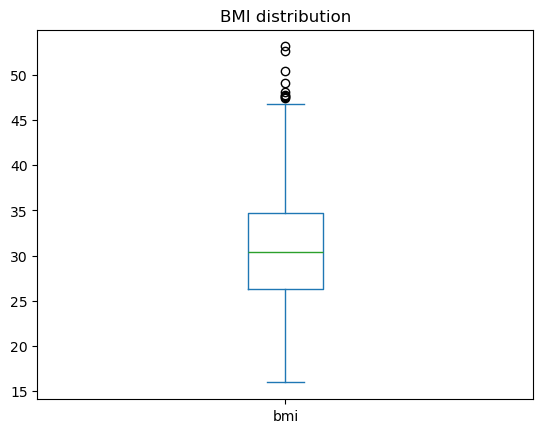

In [72]:
insurance_df1['bmi'].plot(kind = 'box')
plt.title("BMI distribution")
plt.show()

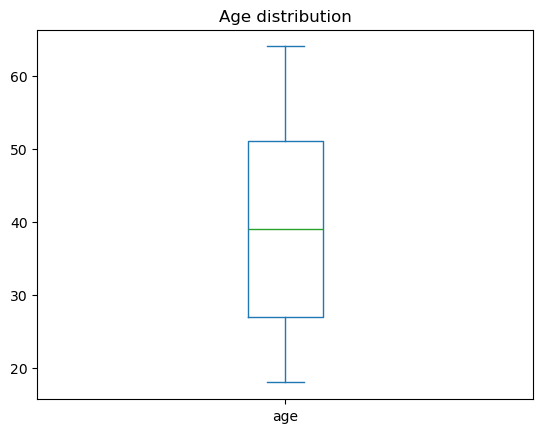

In [74]:
insurance_df1['age'].plot(kind = 'box')
plt.title("Age distribution")
plt.show()

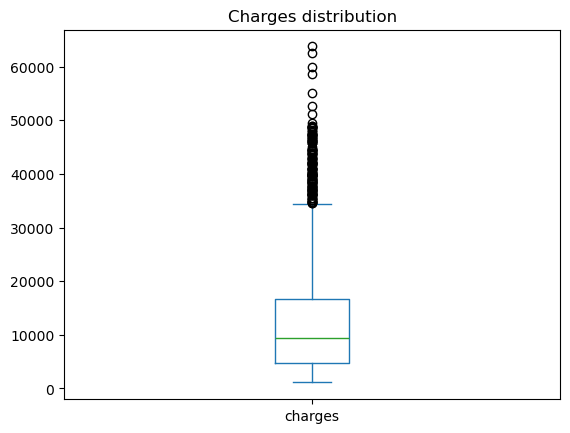

In [76]:
insurance_df1['charges'].plot(kind = 'box')
plt.title("Charges distribution")
plt.show()

In [78]:
region_count = insurance_df1["region"].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

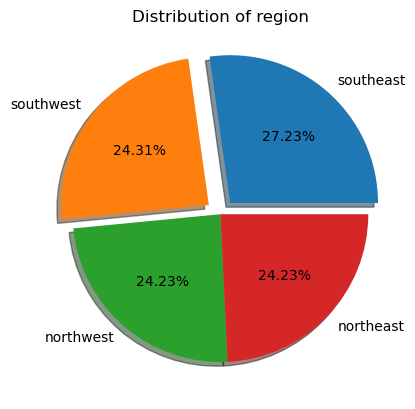

In [88]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct = '%.2f%%',
        explode = (0.1, 0.1, 0, 0))
plt.title("Distribution of region")
plt.show()

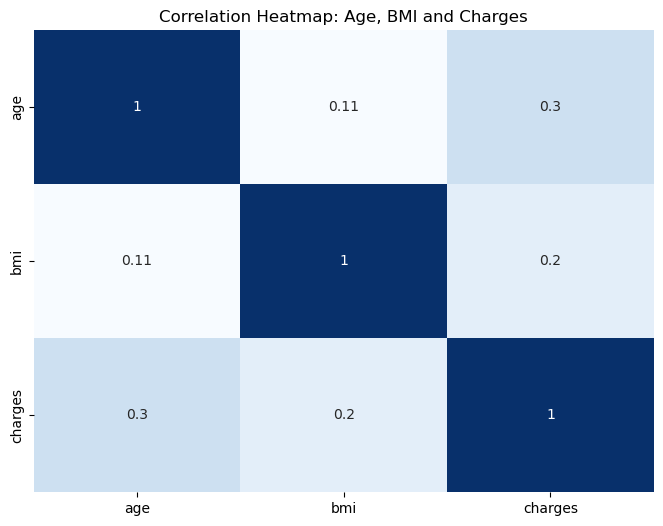

In [96]:
corr_data = insurance_df1[["age", "bmi", "charges"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data, 2), annot=True, cmap="Blues", cbar=False)
plt.title("Correlation Heatmap: Age, BMI and Charges")
plt.show()

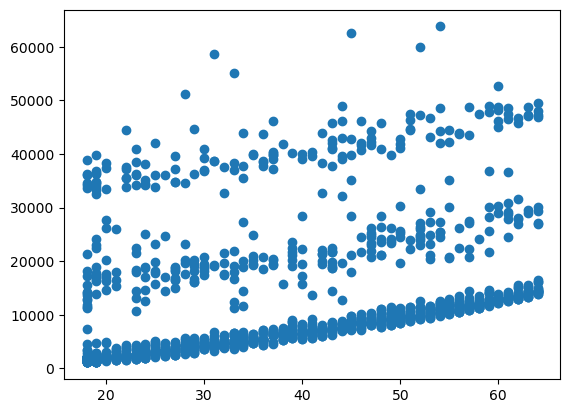

In [98]:
plt.scatter(data = insurance_df1, x = 'age', y = 'charges')


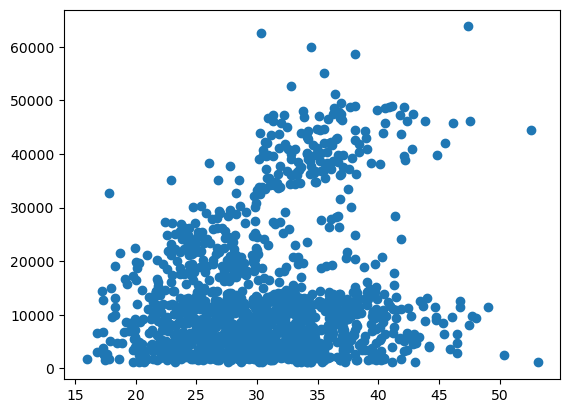

In [100]:
plt.scatter(data = insurance_df1, x = 'bmi', y = 'charges')

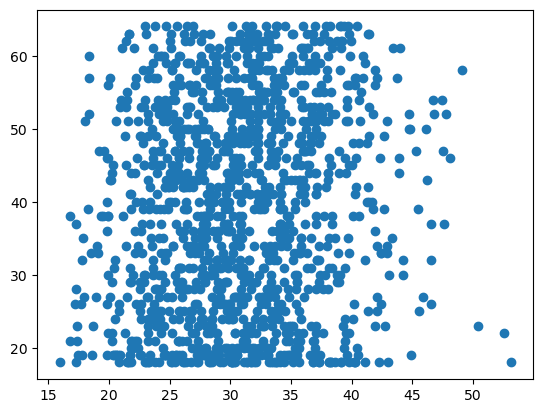

In [102]:
plt.scatter(data = insurance_df1, x = 'bmi', y = 'age')

In [118]:
smoker_df = insurance_df1.groupby('smoker')["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

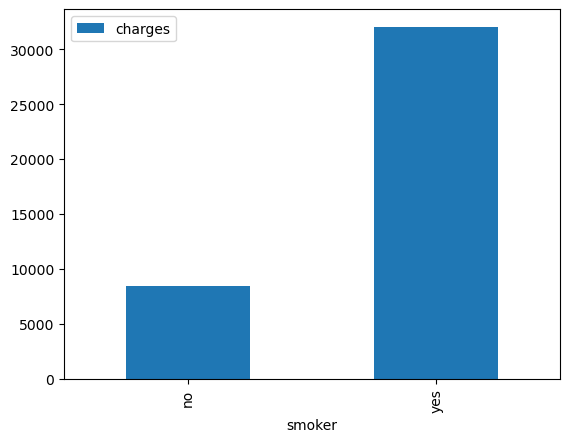

In [108]:
smoker_df.plot(kind = 'bar', x = 'smoker', y = 'charges')

In [110]:
gender_df = insurance_df1.groupby('sex')["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

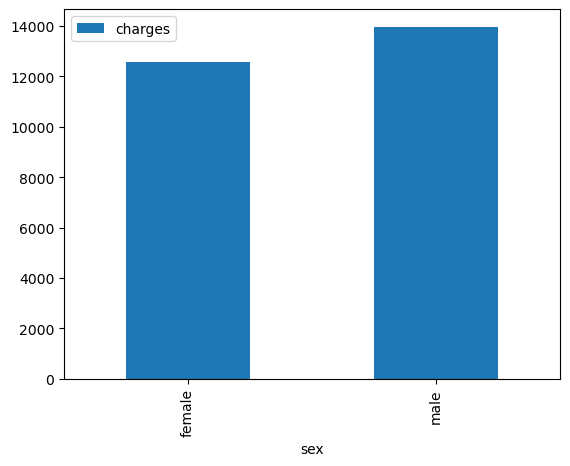

In [114]:
gender_df.plot(kind = 'bar', x = 'sex', y = 'charges')

In [120]:
region_df = insurance_df1.groupby('region')["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

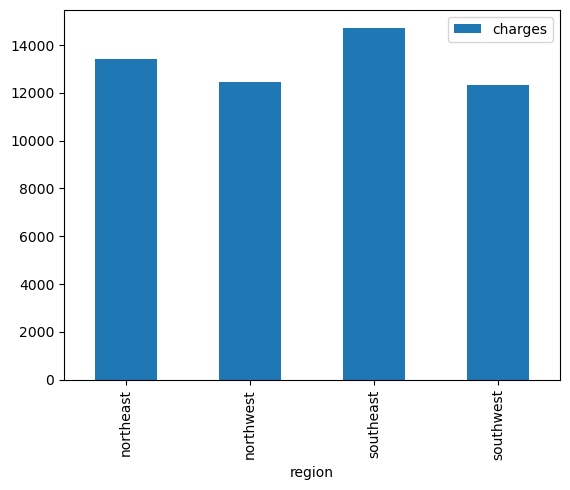

In [122]:
region_df.plot(kind = 'bar', x = 'region', y = 'charges')

In [124]:
region_bmi_df = insurance_df1.groupby('region')["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

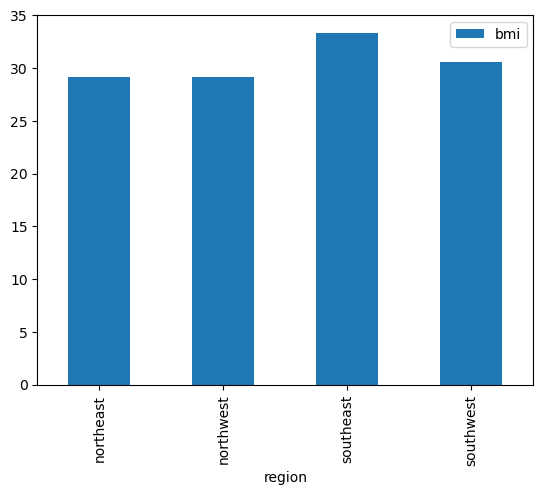

In [126]:
region_bmi_df.plot(kind = 'bar', x = 'region', y = 'bmi')

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
insurance_df1['sex'] = le.fit_transform(insurance_df1['sex'])
insurance_df1['smoker'] = le.fit_transform(insurance_df1['smoker'])
insurance_df1['region'] = le.fit_transform(insurance_df1['region'])

C:\Users\ODCHC PC\AppData\Local\Temp\ipykernel_16244\3657821667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df1['sex'] = le.fit_transform(insurance_df1['sex'])
C:\Users\ODCHC PC\AppData\Local\Temp\ipykernel_16244\3657821667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df1['smoker'] = le.fit_transform(insurance_df1['smoker'])
C:\Users\ODCHC PC\AppData\Local\Temp\ipykernel_16244\3657821667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [136]:
insurance_df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [138]:
x = insurance_df1.drop(columns=["charges"], axis=1)
y = insurance_df1["charges"] 

In [140]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [142]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, shuffle= True)

#shape of split datat
print(f"the shape of x train: {x_train.shape}")
print(f"the shape of y train: {y_train.shape}")

print("*"*30)

print(f"the shape of x test: {x_test.shape}")
print(f"the shape of y test: {y_test.shape}")


the shape of x train: (1069, 6)
the shape of y train: (1069,)
******************************
the shape of x test: (268, 6)
the shape of y test: (268,)


In [148]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [150]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [156]:
x['age'] = std_scaler.fit_transform(np.array(x['age']).reshape(-1, 1))
x['bmi'] = std_scaler.fit_transform(np.array(x['bmi']).reshape(-1, 1))
x['children'] = std_scaler.fit_transform(np.array(x['children']).reshape(-1, 1))  
                                         

In [158]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [160]:
from sklearn.linear_model import LinearRegression

In [164]:
linear_reg_model = LinearRegression()

In [166]:
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [170]:
#cross validation
from sklearn.model_selection import cross_val_score, cross_validate

In [176]:
result = cross_validate(linear_reg_model, x, y, cv = 5, return_train_score = True, scoring ='r2')
result

{'fit_time': array([0.08219481, 0.00801563, 0.00801516, 0.00798655, 0.        ]),
 'score_time': array([0.01404643, 0.        , 0.00799704, 0.        , 0.00799775]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [180]:
train_acc = result['train_score'].mean() * 100
print ('Training Accuracy = ', round(train_acc,2), '%')

Training Accuracy =  75.08 %


In [182]:
test_acc = result ['test_score'].mean() *100
print('Testing Accuracy = ', round(test_acc,2), '%')

Testing Accuracy =  74.71 %


In [188]:
# Multiple Models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [195]:
models = []
models.append(("Linear Regression", LinearRegression()))
models.append(("Knn", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))
for model in models:
    result = cross_validate(model[1], x, y, cv = 5, return_train_score = True, scoring = 'r2')
    print(model[0])
    train_acc = round((result["train_score"].mean()) * 100, 2)
    test_acc =  round((result["test_score"].mean()) * 100, 2)
    print(f'Train R2 Score : {train_acc}')
    print(f'Test R2 Score : {test_acc}')
    print ('\n')

Linear Regression
Train R2 Score : 75.08
Test R2 Score : 74.71


Knn
Train R2 Score : 81.44
Test R2 Score : 68.87


Decision Tree
Train R2 Score : 99.9
Test R2 Score : 71.34


Random Forest
Train R2 Score : 97.67
Test R2 Score : 83.54




In [199]:
# random forest hyperparameters tunning using randomsearch
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [227]:
params = {
    'n_estimators' : [100, 200, 300], #number of trees in random forest
    'max_depth' : [None, 5, 10], #maximum number of levels in tree
    'min_samples_split' : [2, 5, 10], #minimum number of samples required to split a node
    'min_samples_leaf' : [1, 2, 4], #minimum number of samples required at each leaf node
    'bootstrap' : [True, False] #method of selecting  samples for traning each tree
}
## Tunning using random search
random_search = RandomizedSearchCV(
    param_distributions=params, #specify the paramemter distribution to sample from
    estimator=RandomForestRegressor(), #specify the estimator to use
    cv=5, #number of cross validation folds
    return_train_score=True,
    scoring='r2', #scoring metric to optimize
    n_jobs=-1 #use all available CPU cores for parallel computation
)

In [229]:
random_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [231]:
random_search.best_params_


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [235]:
random_search.cv_results_['mean_train_score'].mean() * 100

93.22387818022969

In [237]:
random_search.cv_results_['mean_test_score'].mean() * 100

83.2393412952306

In [241]:
RF = RandomForestRegressor(n_estimators=100,
                           min_samples_split=2,
                           min_samples_leaf=2,
                           max_depth=5,
                           bootstrap=True)

In [253]:
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2)

In [245]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [247]:
  from sklearn.metrics import r2_score

In [259]:
predicted_train_data = RF.predict(x_train)
train_score = r2_score(y_true=y_train, y_pred=predicted_train_data)
predicted_test_data = RF.predict(x_test)
test_score = r2_score(y_true=y_test, y_pred=predicted_test_data)
print(f"R-squared (R^2) for training data using random forest: {round(train_score,2)*100} %")
print(f"R-squared (R^2) for testing data using random forest: {round(test_score,2)*100} %")

R-squared (R^2) for training data using random forest: 88.0 %
R-squared (R^2) for testing data using random forest: 90.0 %


## Create scatter plot with a regression line

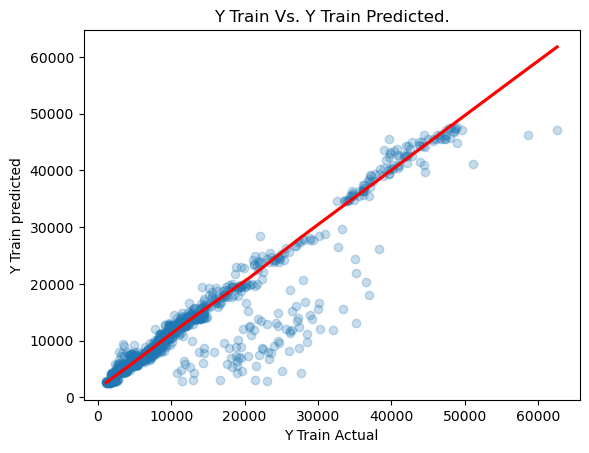

In [270]:
sns.regplot(x = y_train, y = predicted_train_data,
            lowess = True, ## Add a locally weighted scatterplot smoothing line
            line_kws = {'color': 'red'}, ## the color of the regression line
            scatter_kws = {'alpha': 0.25}) ## the transparency of the scatter plot points

plt.title("Y TRAIN VS. Y TRAIN PREDICTED.".title())
plt.xlabel("Y Train Actual")
plt.ylabel("Y Train predicted")
plt.show()           

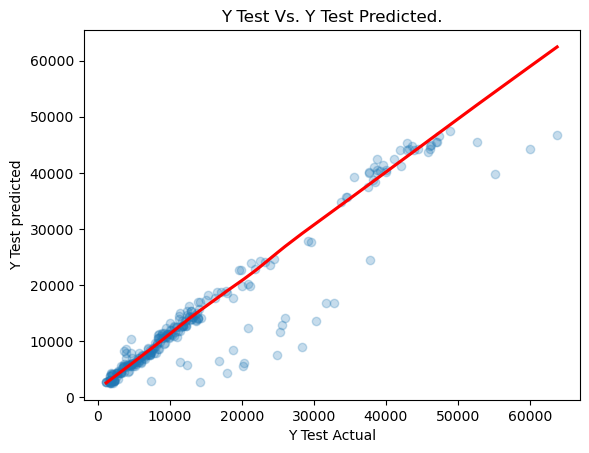

In [272]:
sns.regplot(x = y_test, y = predicted_test_data,
            lowess = True, ## Add a locally weighted scatterplot smoothing line
            line_kws = {'color': 'red'}, ## the color of the regression line
            scatter_kws = {'alpha': 0.25}) ## the transparency of the scatter plot points

plt.title("Y TEST VS. Y TEST PREDICTED.".title())
plt.xlabel("Y Test Actual")
plt.ylabel("Y Test predicted")
plt.show()           

In [274]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


## Customized predictions

In [ ]:
age = 24
sex = 1 
bmi = 35
chidren = 3
smoker = 1
region = 3

In [290]:
age1 = std_scaler.transform(24)
age[0][0]

ValueError: Expected 2D array, got scalar array instead:
array=24.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [288]:
age1 = std_scaler.transform(24)

bmi1 = std_scaler.transform(35)
bmi1[0][0]
cld1 = std_scaler.transform(3)
cld1[0][0]


ValueError: Expected 2D array, got scalar array instead:
array=24.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.